In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from os import path

In [61]:
names = {
    'xs.jpg': 1,
    's.jpg': 2,
    's+.jpg': 3,
    'm.jpg': 4,
    'm+.jpg': 5,
    'l.jpg': 6,
    'xl.jpg': 7,
    'xxl.jpg': 8
}

In [62]:
data = pd.read_csv('./result.csv', index_col='n')
data['img'] = data['img'].map(lambda x: names[path.basename(x)])
data

img  time
n            
1     6  1.29
1     6  1.26
1     6  1.29
1     6  1.26
1     6  1.28
..  ...   ...
6     8  3.38
6     8  3.40
6     8  3.34
6     8  3.32
6     8  3.38

[2400 rows x 2 columns]

In [63]:
data.groupby(['n', 'img']).mean()

time
n img        
1 1    0.0781
  2    0.1087
  3    0.1186
  4    0.1814
  5    0.3751
  6    1.2678
  7    4.5774
  8    9.3441
4 1    0.1401
  2    0.1516
  3    0.1536
  4    0.1826
  5    0.2644
  6    0.6178
  7    2.0001
  8    3.9493
6 1    0.1356
  2    0.1448
  3    0.1405
  4    0.1736
  5    0.2428
  6    0.5383
  7    1.7397
  8    3.3843

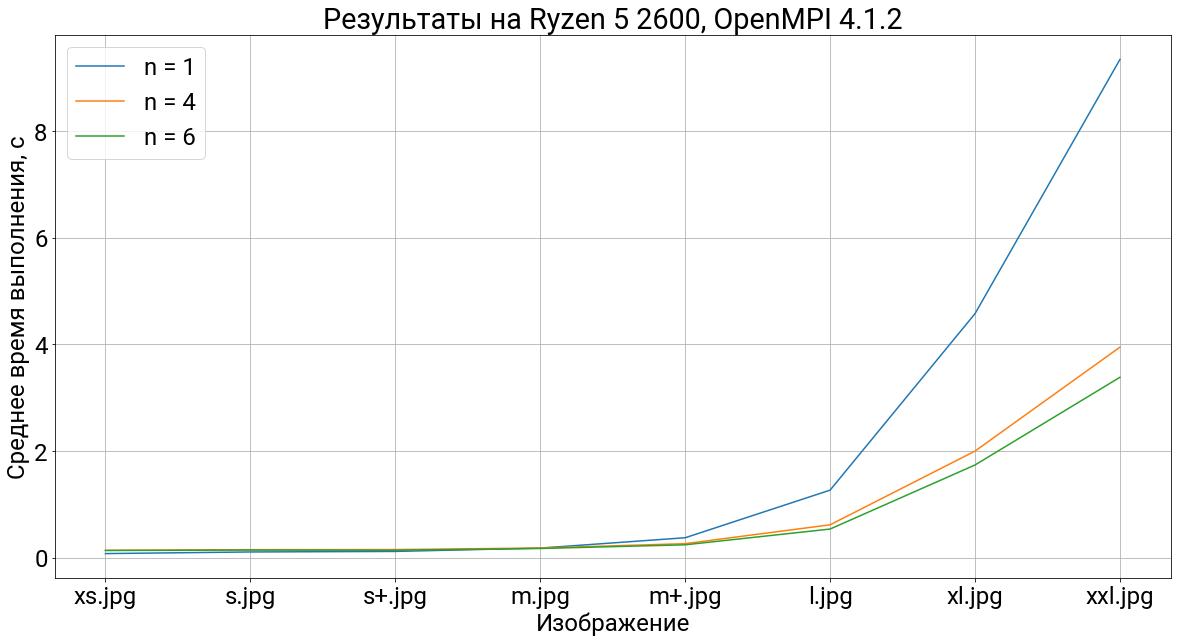

In [90]:
xticks = list(names.keys())

font = {
    'family': 'Roboto',
    'size': 24
}
plt.rc('font', **font)

fig, ax = plt.subplots()
plt.set_cmap('rainbow')

for i in ["1", "4", "6"]:
    d = data.filter(axis=0, like=i)
    d = d.groupby(['img']).mean().unstack()
    # d = d.sort_values('time').unstack()
    d.plot(figsize=(20, 10), y='time', x=None, kind='line', ax=ax, grid=True)

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
for i, l in enumerate(labels):
    if l == "":
        continue
    labels[i] = xticks[int(l.split(', ')[1][:-1]) - 1]
ax.set_xticklabels(labels) 

plt.legend([f"n = {i}" for i in ["1", "4", "6"]])
plt.xlabel("Изображение")
plt.ylabel("Среднее время выполнения, с")
plt.title("Результаты на Ryzen 5 2600, OpenMPI 4.1.2")

plt.show()


In [91]:
fig.savefig('r2600_plot.png', dpi=300)